In [1]:
import pandas as pd
import numpy as np

In [2]:
patients_df = pd.read_csv('mohs_patients_10000.csv')

In [3]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
cat_cols = ['TumorType', 'Location', 'HistologicSubtype', 'SpeaksEnglish', 'Immunosuppressed']
for col in cat_cols:
    patients_df[col] = LabelEncoder().fit_transform(patients_df[col])

# Features & target
features = ['TumorType', 'Location', 'TumorDiameter_mm', 'HistologicSubtype', 'SpeaksEnglish', 'Age', 'Immunosuppressed']
X = patients_df[features]
y = patients_df['ComplexityBinary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM binary classifier
clf = lgb.LGBMClassifier(objective='binary', metric='binary_logloss')
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 2339, number of negative: 5661
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 278
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.292375 -> initscore=-0.883877
[LightGBM] [Info] Start training from score -0.883877
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1398
           1       0.89      0.71      0.79       602

    accuracy                           0.89      2000
   macro avg       0.89      0.84      0.86      2000
weighted avg       0.89      0.89      0.88      2000



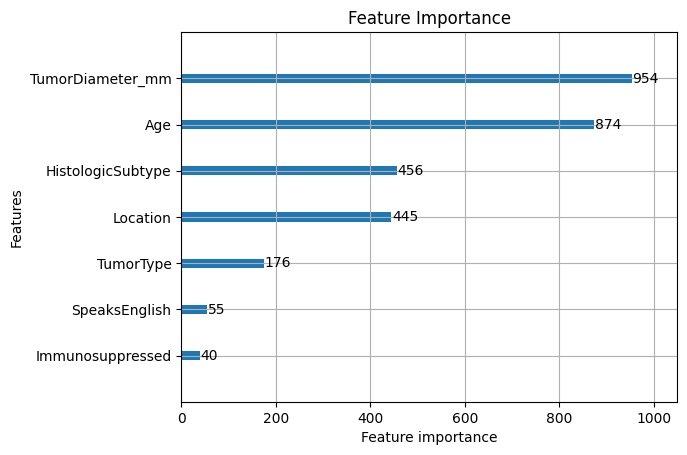

In [5]:
import matplotlib.pyplot as plt
lgb.plot_importance(clf if 'clf' in locals() else reg, max_num_features=10)
plt.title("Feature Importance")
plt.show()